In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, ttest_ind_from_stats
from numpy.random import seed


In [2]:
path = 'C:/Users/u148533/heart_data_clean.csv'
dat = pd.read_csv(path)

In [3]:
dat.shape

(302, 15)

In [4]:
dat.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,189,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
1,146,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
2,147,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
3,148,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
4,149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

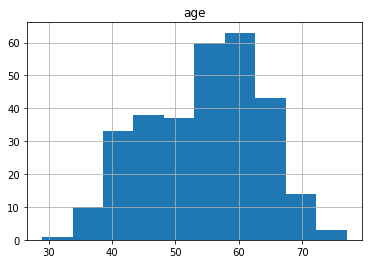

In [5]:
dat.hist('age')

In [6]:
mean = np.mean(dat['age'])

In [7]:
print(mean)

54.420529801324506


In [8]:
std = np.std(dat['age'])

In [9]:
print(std)

9.032977242582099


In [10]:
over45 =dat[dat['age']>45] 
over45

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,189,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
1,146,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
3,148,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
5,353,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
6,343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,460,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
296,450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
297,323,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
299,521,58,1,1,125,220,0,1,144,0,0.4,1,3,3,1


In [11]:
critical = t.ppf(0.95, df=len(over45['age'])-1)
print(f'The critical value is: {critical.round(2)}')

The critical value is: 1.65


In [12]:
SE = std / (np.sqrt(len(over45['age'])))
ME = critical * SE

In [13]:
ci95_lower = (mean - ME).round(2)
print(f'Given the standard error and margin of error is at: {SE.round(2)} and {ME.round(2)}')
print(f'The lower bound of age with 95% confidence interval is at {ci95_lower}')

Given the standard error and margin of error is at: 0.58 and 0.96
The lower bound of age with 95% confidence interval is at 53.46


array([[<AxesSubplot:title={'center':'chol'}>]], dtype=object)

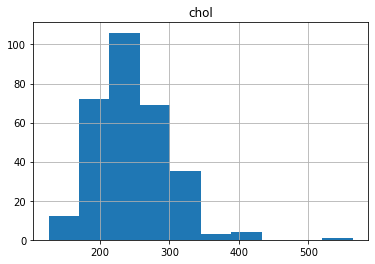

In [14]:
dat.hist('chol')

In [15]:
mean_chol = np.mean(dat['chol'])

In [16]:
print(mean_chol)

246.5


In [17]:
std_chol = np.std(dat['chol'])

In [18]:
print(std_chol)

51.66773302324759


In [19]:
highchol =dat[dat['chol']>246]
highchol

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,189,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
1,146,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
3,148,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
4,149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
8,158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
288,154,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
295,460,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
296,450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [20]:
crit_chol = t.ppf(0.95, df=len(highchol['chol'])-1)
print(f'The critical value is: {crit_chol.round(2)}')

The critical value is: 1.66


In [21]:
SE_chol = std / (np.sqrt(len(highchol['chol'])))
ME_chol = crit_chol * SE_chol

In [22]:
ci95_lower_chol = (mean - ME_chol).round(2)
print(f'Given the standard error and margin of error is at: {SE_chol.round(2)} and {ME_chol.round(2)}')
print(f'The lower bound of chol with 95% confidence interval is at {ci95_lower_chol}')

Given the standard error and margin of error is at: 0.77 and 1.28
The lower bound of chol with 95% confidence interval is at 53.14


array([[<AxesSubplot:title={'center':'trestbps'}>]], dtype=object)

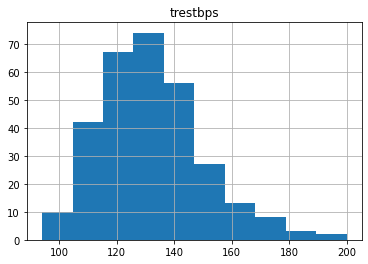

In [23]:
dat.hist('trestbps')

In [24]:
meanbp = np.mean(dat['trestbps'])

In [25]:
print(meanbp)

131.60264900662253


In [26]:
stdbp = np.std(dat['trestbps'])

In [27]:
print(stdbp)

17.534291651254144


In [28]:
highbp=dat[dat['trestbps']>131]
highbp

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,148,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
4,149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
6,343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
7,156,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
10,342,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
297,323,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
298,52,38,1,2,138,175,0,1,173,0,0.0,2,3,2,1
300,128,52,1,2,138,223,0,1,169,0,0.0,2,3,2,1


In [29]:
critbp = t.ppf(0.95, df=len(highbp['age'])-1)
print(f'The critical value is: {critbp.round(2)}')

The critical value is: 1.66


In [30]:
SE_bp = std / (np.sqrt(len(highbp['trestbps'])))
ME_bp = critbp * SE_bp

In [31]:
ci95_lower_bp = (mean - ME_bp).round(2)
print(f'Given the standard error and margin of error is at: {SE_bp.round(2)} and {ME_bp.round(2)}')
print(f'The lower bound of resting blood pressure with 95% confidence interval is at {ci95_lower_bp}')

Given the standard error and margin of error is at: 0.79 and 1.31
The lower bound of resting blood pressure with 95% confidence interval is at 53.11


In [32]:
dat.groupby(by='target')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.00,58.0,62.0,77.0
1,164.0,52.585366,9.511957,29.0,44.75,52.0,59.0,76.0


In [33]:
dat.groupby(by='target')['trestbps'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
1,164.0,129.250000,16.204739,94.0,120.0,130.0,140.00,180.0


In [34]:
dat.groupby(by='target')['chol'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
1,164.0,242.640244,53.456580,126.0,208.75,234.5,267.25,564.0


C:\Users\u148533\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


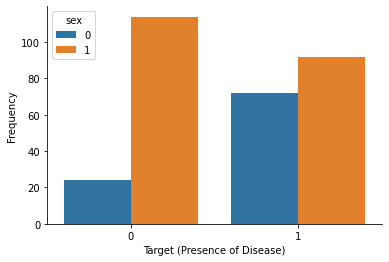

In [35]:
sns.countplot(dat.target,
              hue=dat.sex,
             )
plt.xlabel('Target (Presence of Disease)')
plt.ylabel('Frequency')
sns.despine()
plt.savefig('sex_by_disease')
plt.show()

C:\Users\u148533\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


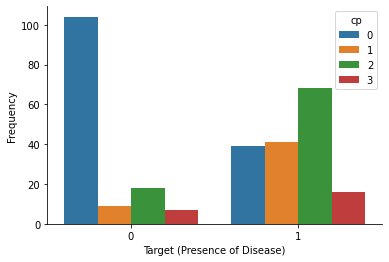

In [36]:
sns.countplot(dat.target,
              hue=dat.cp,
             )
plt.xlabel('Target (Presence of Disease)')
plt.ylabel('Frequency')
sns.despine()
plt.savefig('disease_by_chestpaintype')
plt.show()

C:\Users\u148533\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


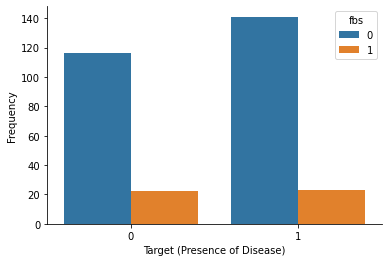

In [37]:
sns.countplot(dat.target,
              hue=dat.fbs,
             )
plt.xlabel('Target (Presence of Disease)')
plt.ylabel('Frequency')
sns.despine()
plt.savefig('fastingbloodsugar_by_disease')
plt.show()

C:\Users\u148533\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


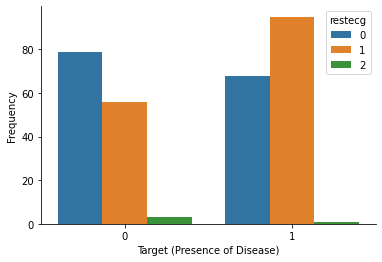

In [38]:
sns.countplot(dat.target,
              hue=dat.restecg,
             )
plt.xlabel('Target (Presence of Disease)')
plt.ylabel('Frequency')
sns.despine()
plt.savefig('restingecg_by_disease')
plt.show()

C:\Users\u148533\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


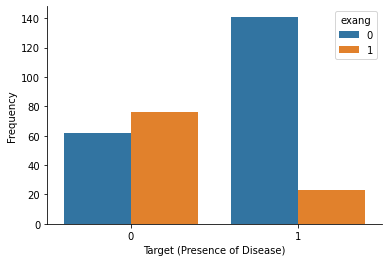

In [39]:
sns.countplot(dat.target,
              hue=dat.exang,
             )
plt.xlabel('Target (Presence of Disease)')
plt.ylabel('Frequency')
sns.despine()
plt.savefig('angina_by_disease')
plt.show()

C:\Users\u148533\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


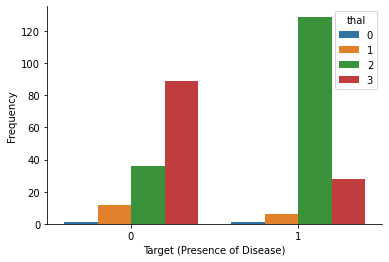

In [40]:
sns.countplot(dat.target,
              hue=dat.thal,
             )
plt.xlabel('Target (Presence of Disease)')
plt.ylabel('Frequency')
sns.despine()
plt.savefig('defectstatus_by_disease')
plt.show()

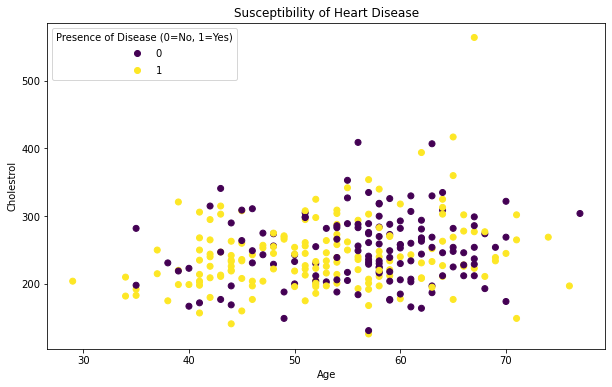

In [41]:

fig,ax= plt.subplots(figsize=(10,6))
#home, room
#plot the data

scatter_plot = ax.scatter(x=dat['age'],
                         y=dat['chol'],
                         c=dat['target'])
# customization
ax.set(title='Susceptibility of Heart Disease',
      xlabel= 'Age',
      ylabel='Cholestrol')
# set the legend
ax.legend(*scatter_plot.legend_elements(), title = 'Presence of Disease (0=No, 1=Yes)')
scatter_plot;

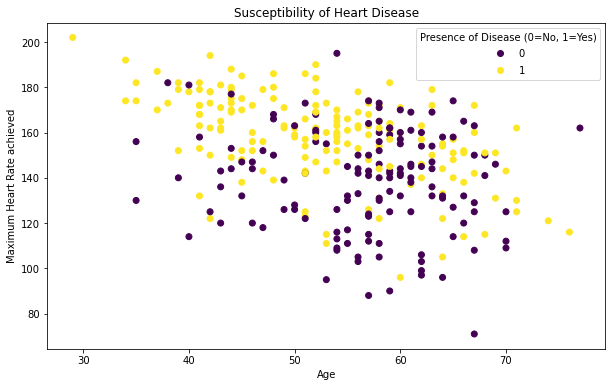

In [42]:
fig,ax= plt.subplots(figsize=(10,6))
#home, room
#plot the data

scatter_plot = ax.scatter(x=dat['age'],
                         y=dat['thalach'],
                         c=dat['target'])
# customization
ax.set(title='Susceptibility of Heart Disease',
      xlabel= 'Age',
      ylabel='Maximum Heart Rate achieved')
# set the legend
ax.legend(*scatter_plot.legend_elements(), title = 'Presence of Disease (0=No, 1=Yes)')
scatter_plot;

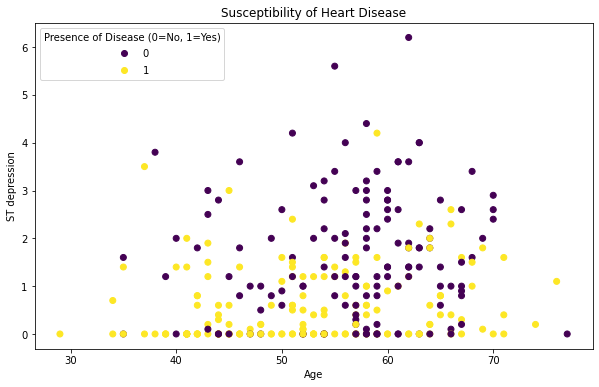

In [43]:
fig,ax= plt.subplots(figsize=(10,6))
#home, room
#plot the data

scatter_plot = ax.scatter(x=dat['age'],
                         y=dat['oldpeak'],
                         c=dat['target'])
# customization
ax.set(title='Susceptibility of Heart Disease',
      xlabel= 'Age',
      ylabel='ST depression')
# set the legend
ax.legend(*scatter_plot.legend_elements(), title = 'Presence of Disease (0=No, 1=Yes)')
scatter_plot;

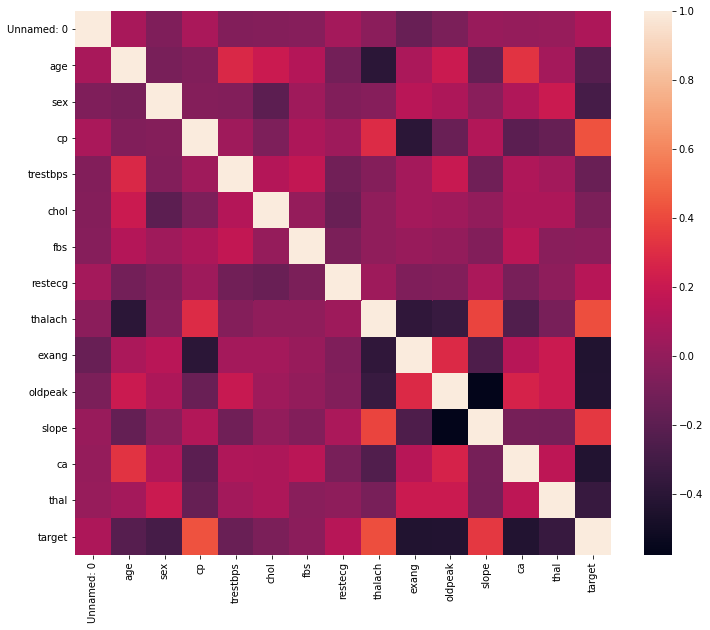

In [44]:
plt.subplots(figsize=(12,10))
sns.heatmap(dat.corr());

There seems to be a slight correlation between chest pain/maximum heart rate achieved and target, but nothing hugely significant
